# Лабораторная работа 3
Команда 19
Рысаев, Семенихина, Павленко
#### ПРИМЕЧАНИЕ. Для этой лабораторной работы вам нужна подвыборка с 3-5 случайными величинами, по крайней мере, половина из них должна быть представлена непрерывными случайными величинами
#### Шаг 1. Выберите подвыборку с основными переменными для дальнейшего анализа. Затем для каждой из них:
#### Шаг 2. Вам необходимо сделать непараметрическую оценку плотности распределения в виде гистограммы и используя функцию плотности ядра (или закона вероятности в случае дискретной СВ).
#### Шаг 3. Вам необходимо провести оценку порядковых статистик и представить их в виде “ящиков с усами”.
#### Шаг 4. Найдите одно или несколько теоретических распределений, которые могли бы описать вашу выборку на основе результатов непараметрического анализа.
#### Шаг 5. Оценить параметры выбранных распределений, используя методы максимального правдоподобия и метод наименьших квадратов.
#### Шаг 6. Проверьте оцененные параметры с помощью графика квантиль-квантиль (QQ).
#### Шаг 7. Оценить достоверность подогнанных распределений, используя не менее 2 статистических тестов.
#### Шаг 8. Используя одномерные параметрические распределения, которые были подобраны, выполните семплирование СВ. Используйте для этого не менее 2 различных методов семплирования.

##### Представление набора данных

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

База данных по диабету индейцев пима.
Датасет скачан отсюда https://www.openml.org/search?type=data&sort=runs&status=any&qualities.NumberOfClasses=%3D_2&id=37
Формат arff сконвертирован в csv с помощью arffToCsv.py https://github.com/haloboy777/arfftocsv

In [2]:
from numpy import genfromtxt
data = pd.read_csv('/home/muratok/data/dataset_37_diabetes.csv')
data

'preg'  'plas'  'pres'  'skin'  'insu'  'mass'  'pedi'  'age'  \
0         6     148      72      35       0    33.6   0.627     50   
1         1      85      66      29       0    26.6   0.351     31   
2         8     183      64       0       0    23.3   0.672     32   
3         1      89      66      23      94    28.1   0.167     21   
4         0     137      40      35     168    43.1   2.288     33   
..      ...     ...     ...     ...     ...     ...     ...    ...   
763      10     101      76      48     180    32.9   0.171     63   
764       2     122      70      27       0    36.8   0.340     27   
765       5     121      72      23     112    26.2   0.245     30   
766       1     126      60       0       0    30.1   0.349     47   
767       1      93      70      31       0    30.4   0.315     23   

             'class'  
0    tested_positive  
1    tested_negative  
2    tested_positive  
3    tested_negative  
4    tested_positive  
..               ...  
763  tested_negative  
764  tested_negative  
765  tested_negative  
766  tested_positive  
767  tested_negative  

[768 rows x 9 columns]

'preg' - Number of times pregnant /Количество беременностей __ДСВ__ \
'plas' - Plasma glucose concentration a 2 hours in an oral glucose tolerance test __НСВ__ \
'pres' - Diastolic blood pressure (mm Hg) /Диастолическое артериальное давление (мм рт.ст.) __НСВ__ \
'skin' - Triceps skin fold thickness (mm) /Толщина кожной складки на трицепсе (мм) __НСВ__ \
'insu - '2-Hour serum insulin (mu U/ml) __НСВ__ \
'mass' - Body mass index (weight in kg/(height in m)^2) __НСВ__ \
'predi' - Diabetes pedigree function /Функция родословной диабета\
'age' - Age (years) __ДСВ__ \
'class' - Class variable (0 or 1)'''

In [3]:
amount_of_data = data.shape[0]

In [4]:
for i in range(amount_of_data):
    if data["'class'"][i] == 'tested_positive':
        data["'class'"][i] = '1'
    if data["'class'"][i] == 'tested_negative':
        data["'class'"][i] = '0'

In [5]:
y = data["'class'"].to_numpy().astype(float)

Определим, к какому типу распределения подходят наши данныe:

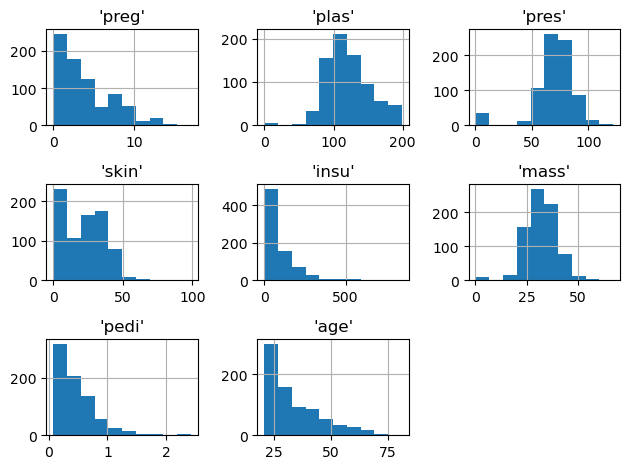

In [6]:
_ = data.hist()
plt.tight_layout()

In [7]:
data.columns

Index([''preg'', ''plas'', ''pres'', ''skin'', ''insu'', ''mass'', ''pedi'',
       ''age'', ''class''],
      dtype='object')

In [8]:
data = data.drop(["'pres'", "'skin'", "'insu'", "'pedi'", "'class'"], axis=1)
data

'preg'  'plas'  'mass'  'age'
0         6     148    33.6     50
1         1      85    26.6     31
2         8     183    23.3     32
3         1      89    28.1     21
4         0     137    43.1     33
..      ...     ...     ...    ...
763      10     101    32.9     63
764       2     122    36.8     27
765       5     121    26.2     30
766       1     126    30.1     47
767       1      93    30.4     23

[768 rows x 4 columns]

In [9]:
data.isna().sum() #  как видим пропущенных значений нет

'preg'    0
'plas'    0
'mass'    0
'age'     0
dtype: int64

In [10]:
if data["'preg'"].all() == 0:
    print("есть нулевые значения")
else:
    print("нулевых значений нет")

есть нулевые значения


Но женщина может не иметь детей - поэтому нули тут могут буть, оставляем нули

In [11]:
if data["'plas'"].all() == 0:
    print("есть нулевые значения")
else:
    print("нулевых значений нет")

есть нулевые значения


А вот концентрация глюкозы "plas" не может быть равна нулю. Заменим эти значения на средние

In [12]:
data["'plas'"] = data["'plas'"].replace(0, data["'plas'"].mean())
if data["'plas'"].all() == 0:
    print("есть нулевые значения")
else:
    print("нулевых значений нет")

нулевых значений нет


In [13]:
if data["'mass'"].all() == 0:
    print("есть нулевые значения")
else:
    print("нулевых значений нет")

есть нулевые значения


Масса не может быть равна нулю, также заменим эти значения на средние

In [14]:
data["'mass'"] = data["'mass'"].replace(0, data["'mass'"].mean())
if data["'mass'"].all() == 0:
    print("есть нулевые значения")
else:
    print("нулевых значений нет")

нулевых значений нет


In [15]:
if data["'age'"].all() == 0:
    print("есть нулевые значения")
else:
    print("нулевых значений нет")

нулевых значений нет


In [16]:
data = data[["'plas'", "'mass'", "'age'", "'preg'"]]  # меняю местами

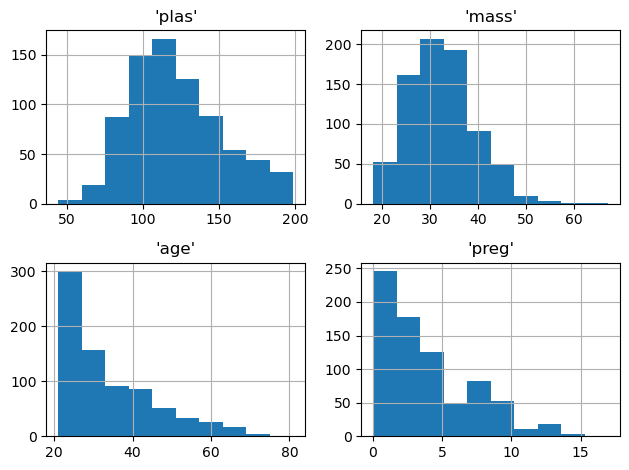

In [17]:
_ = data.hist()
plt.tight_layout()

Оставлили 2 НСВ и 2 ДСВ: \
'plas' - Plasma glucose concentration a 2 hours in an oral glucose tolerance test __НСВ__ \
'mass' - Body mass index (weight in kg/(height in m)^2) __НСВ__ \
'age' - Age (years) __ДСВ__ \
'preg' - Number of times pregnant /Количество беременностей __ДСВ__ 

##### Непараметрическая оценка плотности распределения в виде гистограммы и используя функцию плотности ядра / закона вероятности

In [18]:
import seaborn as sns

Для непараметрической оценки НСВ (используюя функцию ядра) юзаем график kdeplot библитоеки seaborn, гистограммы строим с помощью histplot

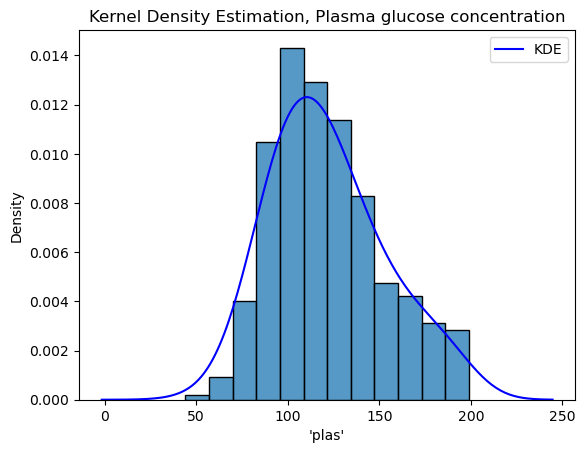

In [19]:
sns.kdeplot(data["'plas'"], bw_method=0.5, label="KDE", color='b')  # больше bw_method плавнее график
sns.histplot(data, x="'plas'", bins=12, stat="density");
plt.title("Kernel Density Estimation, Plasma glucose concentration")
plt.legend()
plt.show()

In [20]:
data["'plas'"].mean()

121.68160502115886

Наибольшая плотность у переменной 'plas' (Plasma glucose concentration) в диапазон 110-125. gamma распределение может подойти или нормальное

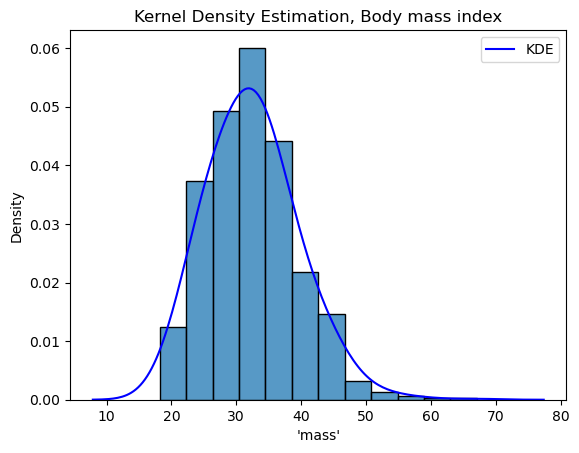

In [21]:
sns.kdeplot(data["'mass'"], bw_method=0.5, label="KDE", color='b')  # больше bw_method плавнее график
sns.histplot(data, x="'mass'", bins=12, stat="density");
plt.title("Kernel Density Estimation, Body mass index")  
plt.legend()
plt.show()

In [22]:
data["'mass'"].mean()

32.4508051554362

Для 'Body mass index' наибольшую плотность наблюдамем в диапазоне 30-35. Распределение подобно нормальному

Для непараметрической оценки ДСВ используем график histplot библитоеки seaborn, c параметрами stat="density", discrete=True, получаем расчет вероятности для каждого значения (плащадь всей гистограммы равна 1)

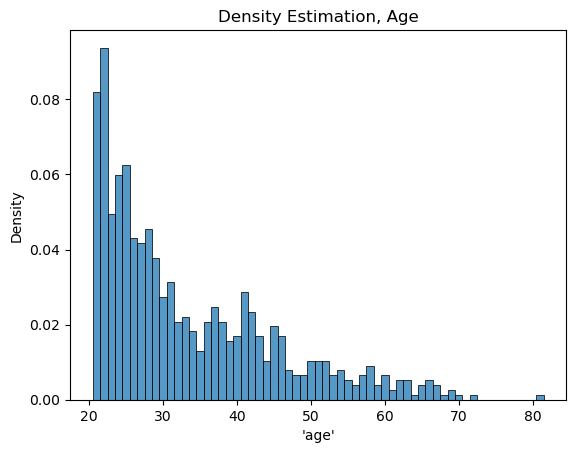

In [23]:
sns.histplot(data, x="'age'", stat="density", discrete=True)
plt.title("Density Estimation, Age")
plt.show()

Как видим больше всего встречается людей с возрастом 22г, имеем явное смещение влево, с увеличением возраста имеется тенденция к уменьшению. \
Для описания лучше использовать экспоненту

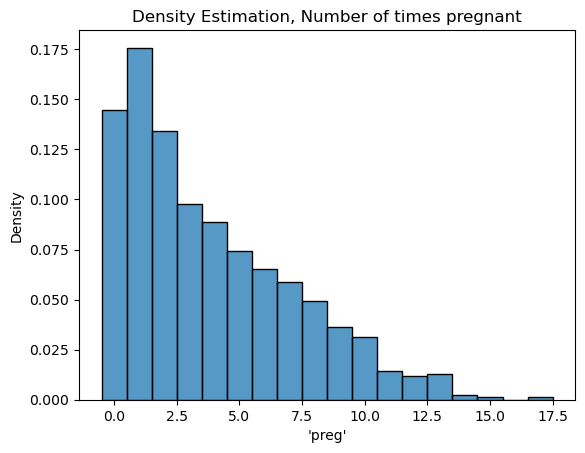

In [24]:
sns.histplot(data, x="'preg'", stat="density", discrete=True)
plt.title("Density Estimation, Number of times pregnant")
plt.show()

Как видим больше всего женщин с 1 беременностью, имеем явное смещение влево, с увеличением парамаетра "количество беременностей" имеется тенденция к уменьшению. \
Для описания лучше использовать экспоненту

In [25]:
data["'preg'"].value_counts() # тут также это видно c 1 беременностью 135 женщин

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: 'preg', dtype: int64

#### Оценка порядковых статистик и представление их в виде “ящиков с усами”

Ящик с усами наглядно показывает нам следющих характеристики выборки: центрированность, разброс, симметричность, рахмер хвоста, наличие выбросов. Содержит нижний и верхний квартиль, медиану, наименьшее и наибольшее значение, кот не являются выбросом (усы)

Text(0.5, 1.0, "Box-and-whisker plot for 'plas'")

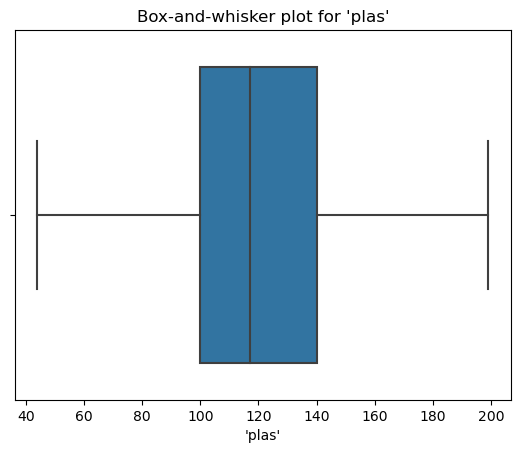

In [26]:
sns.boxplot(data, x="'plas'")
plt.title("Box-and-whisker plot for 'plas'")

In [27]:
data["'plas'"].describe() 

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: 'plas', dtype: float64

центрированность 'plas' - у значений 120 \
разброс - имеется, std 30.4 \
симметричность довольно хорошая \
рахмер хвоста - большой \
Выбросов нет

Text(0.5, 1.0, "Box-and-whisker plot for 'mass'")

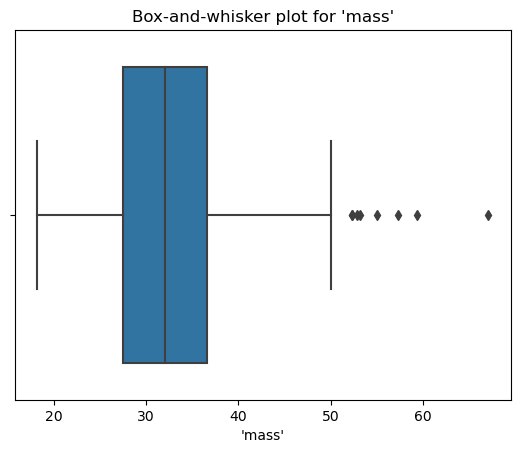

In [28]:
sns.boxplot(data, x="'mass'")
plt.title("Box-and-whisker plot for 'mass'")

In [29]:
data["'mass'"].describe()

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: 'mass', dtype: float64

центрированность 'mass' - у значений 32 \
разброс - имеется не большой, std 6,8 \
симметричность хорошая \
рахмер хвоста - большой \
Выбросы - наблюдаем, все что больше 50

Text(0.5, 1.0, "Box-and-whisker plot for 'age'")

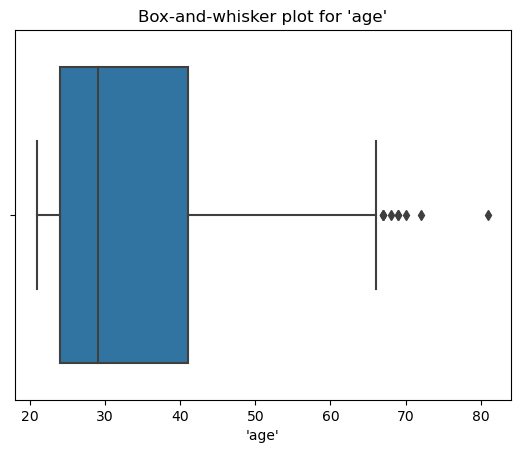

In [30]:
sns.boxplot(data, x="'age'")
plt.title("Box-and-whisker plot for 'age'")

In [31]:
data["'age'"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: 'age', dtype: float64

центрированность 'age' - у значений 33 \
разброс - имеется, std 11,8 \
симметричности не имеем, наблюдаем смещенение влево \
рахмер хвоста - большой \
Выбросы - наблюдаем, все что больше 67

Text(0.5, 1.0, "Box-and-whisker plot for 'preg'")

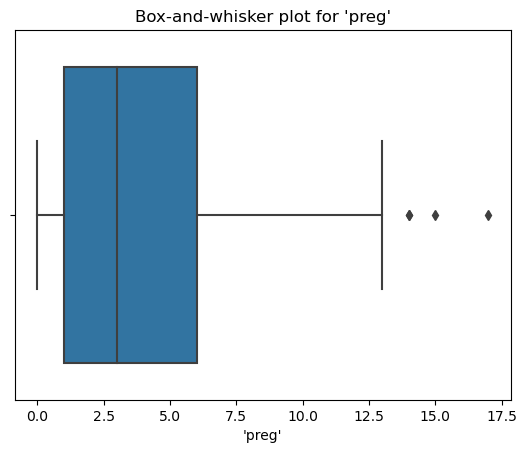

In [32]:
sns.boxplot(data, x="'preg'")
plt.title("Box-and-whisker plot for 'preg'")

In [33]:
data["'preg'"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: 'preg', dtype: float64

центрированность 'preg' - у значений 4 \
разброс - имеется, std 3.4 \
симметричности не имеем, наблюдаем смещенение влево \
рахмер хвоста - большой \
Выбросы - наблюдаем, все что больше 13. Вообще больше 13 беременностей трудно представить конечно..

##### Теоретические распределения, описывающие выборку

На основе результатов непараметрического анализа выбрали для: \
Plasma glucose concentration, 'plas' - вейбулла или гамма распределение \
Body mass index, 'mass' - нормальное распределение \
'age' - экспоненту и \
Number of times pregnant 'preg' - также экспоненту

#### Оценка параметров выбранных распределений, с помощью метода максимального правдоподобия и метода наименьших квадратов

In [34]:
from scipy import stats
from scipy.stats import lognorm, norm, gamma, loggamma, weibull_min, rayleigh, expon, exponnorm, pareto, erlang, beta, dgamma, chi, binom

Maximum Likelihood Estimation (MLE), оценка максимального правдоподобия. Используем scipy.stats.fit для получения параметров указанного распределения, которые максимально правдоподобны для наших данных. На основе этих параметров строим графики распределения

In [35]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
def mle(data, column, distribution):
    # get plot KDE/hist
    if column == "'plas'" or column == "'mass'":
        sns.kdeplot(data[column], c="b", label="KDE")
        sns.histplot(data= data, x=column, bins=11, stat="density")
    else:
#         sns.kdeplot(data[column], c="b", label="KDE")
        sns.histplot(data= data, x=column, stat="density", discrete=True)
    # get plot MLE
    x_axis = np.linspace(min(data[column]), max(data[column]), data.shape[0])
    params = distribution.fit(data[column])
    name_dist = namestr(distribution, globals())
    plt.plot(x_axis, distribution.pdf(x_axis, *params), c="r", label=f"MLE, {name_dist[0]}")
    plt.legend()
    plt.title("Maximum Likelihood Estimation")
    plt.show()
    # get params
    name_params = map(lambda x: x.name, distribution._param_info())
    return(list(zip(name_params, params)))
# params_age_expon = mle(data, "'age'", expon)
# params_age_expon

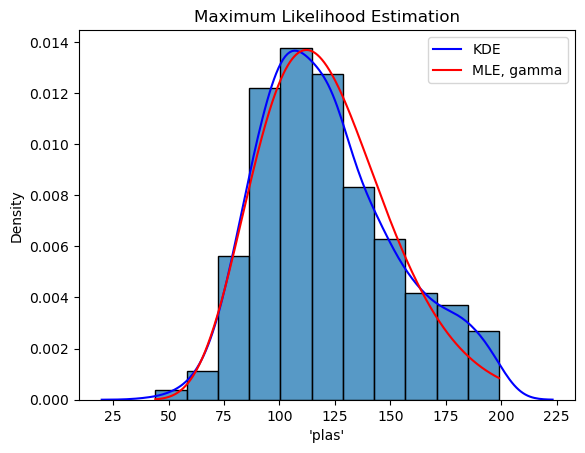

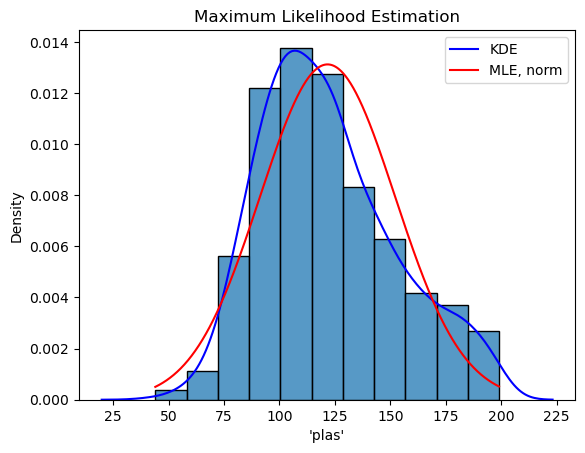

[('loc', 121.68160502115886), ('scale', 30.41619407511029)]

In [36]:
params_plas_gamma = mle(data, "'plas'", gamma)
params_plas_norm = mle(data, "'plas'", norm)
params_plas_norm

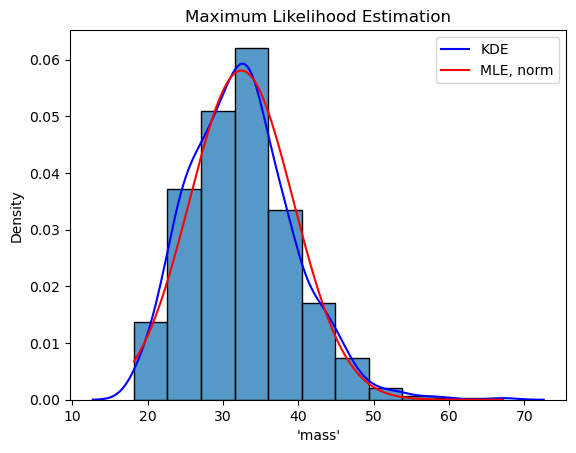

[('loc', 32.4508051554362), ('scale', 6.87089589476018)]

In [37]:
params_mass_norm = mle(data, "'mass'", norm)
params_mass_norm

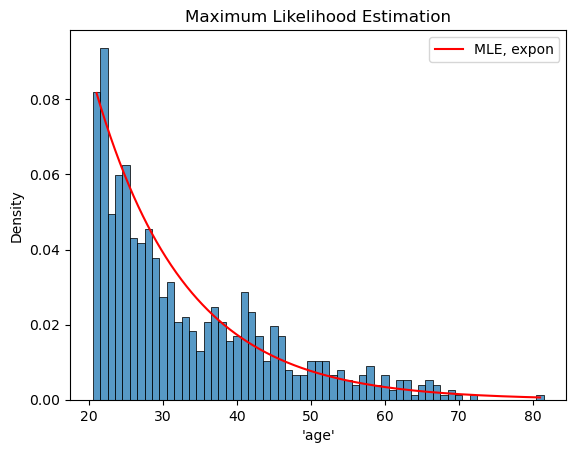

In [38]:
params_age_expon = mle(data, "'age'", expon)

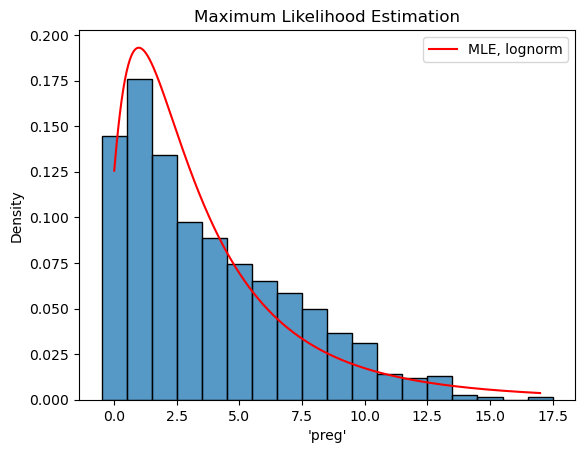

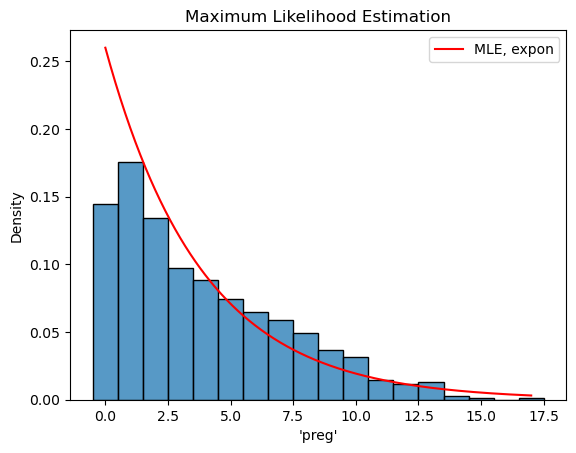

[('loc', 0.0), ('scale', 3.8450520833333335)]

In [39]:
mle(data, "'preg'", lognorm)
params_preg_expon = mle(data, "'preg'", expon)
params_preg_expon

Для оценки параметров с помощью МНК используем minimize из scipy.optimize 

In [40]:
result_plas = 0

In [41]:
from scipy.optimize import minimize

In [42]:
def loss_func_norm(params, data):
    mean = params[0]
    std = params[1]
    quantiles = norm.ppf(np.linspace(0.1,0.9,9), loc=mean, scale=std) 
    quantiles_fact = np.percentile(data, np.linspace(10,90,9)) 
    return np.sum((quantiles - quantiles_fact) ** 2)
def params_MNK_norm(data, column, get_result= False):
    start_params = [np.max(data[column]), np.max(data[column])]
    result = minimize(loss_func_norm, start_params, args=(data[column]), method='L-BFGS-B', tol=10e-6)
    if get_result == False:
        print(f"Параметры МНК для {column}", list(zip(["loc", "scale"],result.x)))
    else:
        return result

In [43]:
def loss_func_expon(params, data):
    mean = params[0]
    std = params[1]
    quantiles = expon.ppf(np.linspace(0.1,0.9,9), loc=mean, scale=std) 
    quantiles_fact = np.percentile(data, np.linspace(10,90,9)) 
    return np.sum((quantiles - quantiles_fact) ** 2)
def params_MNK_expon(data, column, get_result=False):
    start_params = [np.max(data[column]), np.max(data[column])]
    result = minimize(loss_func_expon, start_params, args=(data[column]), method='L-BFGS-B', tol=10e-6)
    if get_result == False:
        print(f"Параметры МНК для {column}", list(zip(["loc", "scale"],result.x)))
    else:
        return result

In [44]:
def loss_func_gamma(params, data):
    a, mean, std = params
    quantiles = gamma.ppf(np.linspace(0.1,0.9,90), a, loc=mean, scale=std) 
    quantiles_fact = np.percentile(data, np.linspace(10,90,90)) 
    return np.sum((quantiles - quantiles_fact) ** 2)
def params_MNK_gamma(data, column, get_result= False):
    start_params = [2, data[column].mean(), data[column].std()]
    result = minimize(loss_func_gamma, start_params, args=(data[column],), method='L-BFGS-B')
    if get_result == False:
        print(f"Параметры МНК для {column}", list(zip(["a", "loc", "scale"],result.x)))
    else:
        return result

In [45]:
params_plas_MNK_gamma = params_MNK_gamma(data, "'plas'", get_result= True)
params_plas_MNK_norm = params_MNK_norm(data, "'plas'", get_result=True)
params_mass_MNK_norm = params_MNK_norm(data, "'mass'", get_result=True)
params_age_MNK_expon = params_MNK_expon(data, "'age'", get_result=True)
params_preg_MNK_expon = params_MNK_expon(data, "'preg'", get_result=True)

In [46]:
params_MNK_norm(data, "'plas'"), 
params_MNK_norm(data, "'mass'"), 
params_MNK_expon(data, "'age'"), 
params_MNK_expon(data, "'preg'")

Параметры МНК для 'plas' [('loc', 120.31111005487467), ('scale', 31.126805465993975)]
Параметры МНК для 'mass' [('loc', 32.17666676440844), ('scale', 6.820294245706048)]
Параметры МНК для 'age' [('loc', 20.279941568461425), ('scale', 13.6440529497064)]
Параметры МНК для 'preg' [('loc', -0.10019962942268557), ('scale', 4.153512923003795)]


Сравнение MLE c оценками параметров, полученных МНК:

In [47]:
def compare_MNK_MLE(data, column, def_params_MNK_norm, result_MLE):
    def_params_MNK_norm(data, column)
    print(f"Параметры MLE для {column}", result_MLE) 

In [48]:
compare_MNK_MLE(data, "'plas'", params_MNK_norm, params_plas_norm)
print("--------------------------------------------------------------------")
compare_MNK_MLE(data, "'mass'", params_MNK_norm, params_mass_norm)
print("--------------------------------------------------------------------")
compare_MNK_MLE(data, "'age'", params_MNK_expon, params_age_expon)
print("--------------------------------------------------------------------")
compare_MNK_MLE(data, "'preg'", params_MNK_expon, params_preg_expon)

Параметры МНК для 'plas' [('loc', 120.31111005487467), ('scale', 31.126805465993975)]
Параметры MLE для 'plas' [('loc', 121.68160502115886), ('scale', 30.41619407511029)]
--------------------------------------------------------------------
Параметры МНК для 'mass' [('loc', 32.17666676440844), ('scale', 6.820294245706048)]
Параметры MLE для 'mass' [('loc', 32.4508051554362), ('scale', 6.87089589476018)]
--------------------------------------------------------------------
Параметры МНК для 'age' [('loc', 20.279941568461425), ('scale', 13.6440529497064)]
Параметры MLE для 'age' [('loc', 21.0), ('scale', 12.240885416666664)]
--------------------------------------------------------------------
Параметры МНК для 'preg' [('loc', -0.10019962942268557), ('scale', 4.153512923003795)]
Параметры MLE для 'preg' [('loc', 0.0), ('scale', 3.8450520833333335)]


Как видим оценки параметров c помощью MLE и МНК не значительно отличаются

#### Проверка оцененных параметров с помощью графика квантиль-квантиль (QQ)

Для построения графиков квантиль-квантиль используем библиотеку scipy.stats.probplot

In [49]:
from scipy.stats import probplot

In [50]:
def qq_plot_MLE(data, column, distribution):
    name_dist = namestr(distribution, globals())
    params = distribution.fit(data[column])
    probplot(data[column], dist=distribution(*params), plot=plt)
    plt.title(f"{column}, Probability Plot (MLE, {name_dist[0]})")
    plt.show()

In [51]:
def qq_plot_MNK(data, column, distribution, result_MNK):
    name_dist = namestr(distribution, globals())
    probplot(data[column], dist=distribution(*result_MNK.x), plot=plt)
    plt.title(f"{column}, Probability Plot (МНК, {name_dist[0]})")
    plt.show()

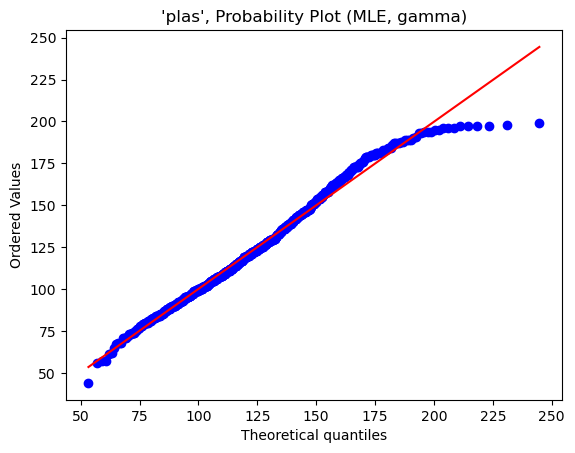

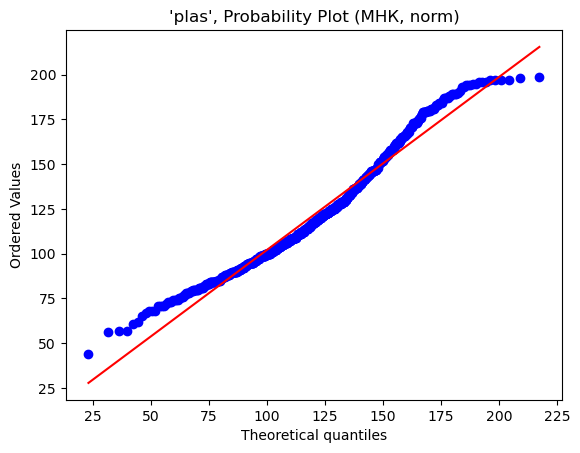

In [52]:
qq_plot_MLE(data, "'plas'", gamma)
qq_plot_MNK(data, "'plas'", norm, params_plas_MNK_norm)

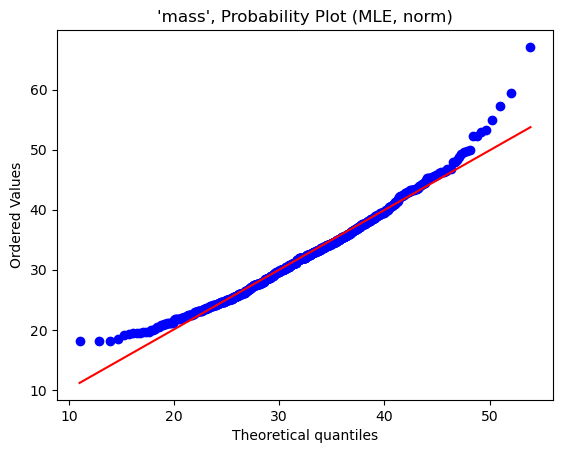

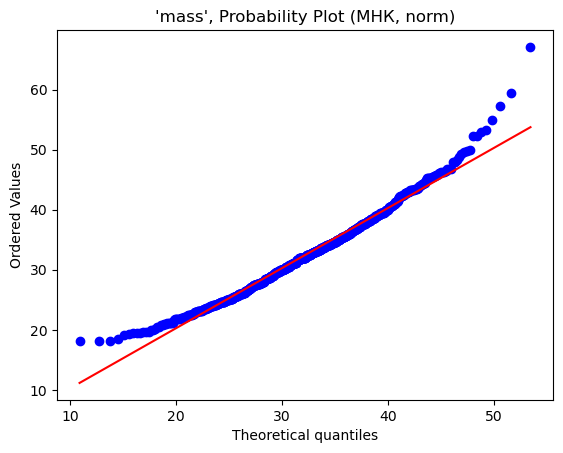

In [53]:
qq_plot_MLE(data, "'mass'", norm)
qq_plot_MNK(data, "'mass'", norm, params_mass_MNK_norm)

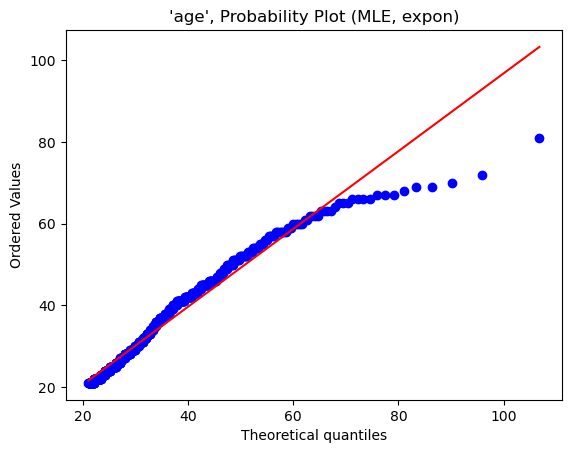

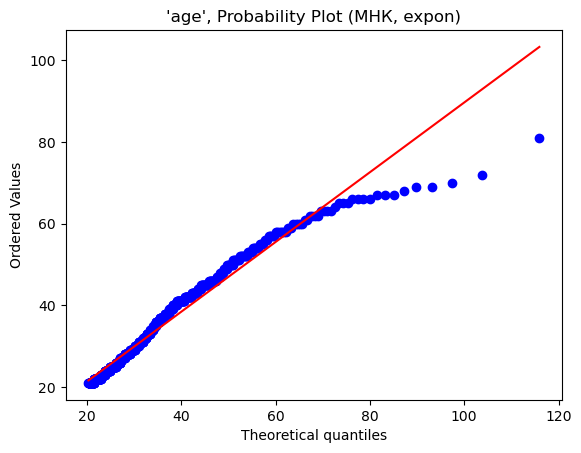

In [54]:
qq_plot_MLE(data, "'age'", expon)
qq_plot_MNK(data, "'age'", expon, params_age_MNK_expon)

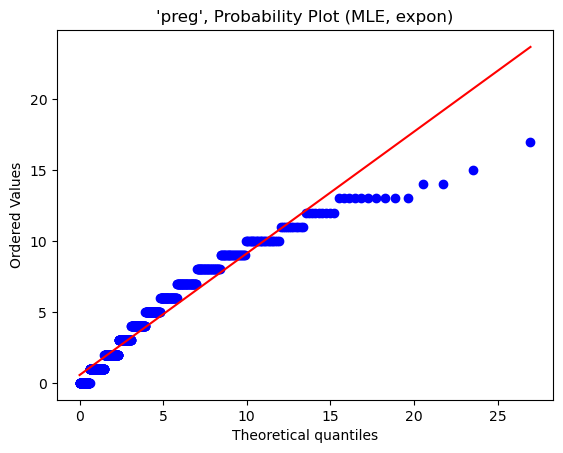

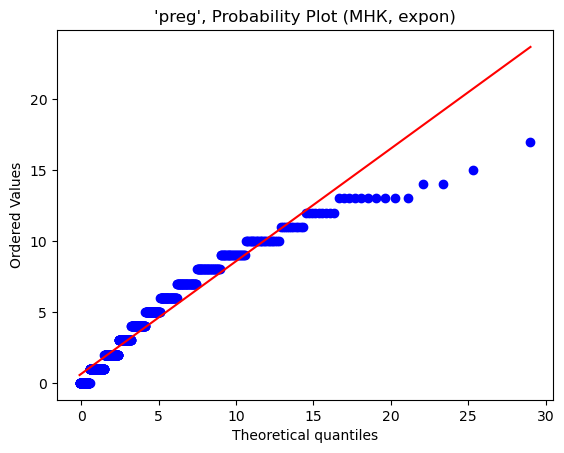

In [55]:
qq_plot_MLE(data, "'preg'", expon)
qq_plot_MNK(data, "'preg'", expon, params_preg_MNK_expon)

В целом параметры хорошо описывают данные. Для концентрации глюкозы 'plas' параметры на основе MLE (gamma) оказались лучше оценок полученных МНК. 
На хвостах у 'mass', 'age', 'preg' есть существенные расходжения, скроее всего на это повлияло то что выбросы не были удалены, которые были обнаружены на графике "ящики с усами"

#### Оценка достоверности подогнанных распределений

Для непрерывных случайных величин в качестве первого теста используем тест согласия Колмогорова-Смирнова. Данный тест помогает принять или отвергнуть гипотезу о том, что распределение НСВ соответствует распределению с найденными параметрами. \
$H_0$ - гипотеза, что распределение НСВ соответствует распределению с вычисленными параметрами в пределах уровня значимости 0.05 \
Для вычисления теста согласия Колмогорова-Смирнова используем kstest из scipy.stats

In [56]:
from scipy.stats import kstest

In [57]:
def Kolmogorov_Smirnov(data, column, distribution, params, alpha=0.05):
    ks = kstest(data[column], distribution, params, N=100)
    if ks[1]< alpha:
        print("Отвергаем H_0 гипотезу, распределение", f'{distribution}',"НЕ cоответствует НСВ",f'{column}')
    else:
        print("Принимаем H_0 гипотезу, распределение", f'{distribution}',"cоответствует НСВ",f'{column}')
    print(ks[1])

In [58]:
params_plas_MLE_gamma = gamma.fit(data["'plas'"])
Kolmogorov_Smirnov(data, "'plas'", "gamma", params_plas_MLE_gamma)

Принимаем H_0 гипотезу, распределение gamma cоответствует НСВ 'plas'
0.3325639993996703


In [59]:
Kolmogorov_Smirnov(data, "'plas'", "gamma", tuple(params_plas_MNK_gamma.x))

Принимаем H_0 гипотезу, распределение gamma cоответствует НСВ 'plas'
0.4974425514994989


In [60]:
params_mass_MLE_norm = norm.fit(data["'mass'"])
Kolmogorov_Smirnov(data, "'mass'", "norm", params_mass_MLE_norm)

Принимаем H_0 гипотезу, распределение norm cоответствует НСВ 'mass'
0.1956839573039897


In [61]:
Kolmogorov_Smirnov(data, "'mass'", "norm", tuple(params_mass_MNK_norm.x))

Принимаем H_0 гипотезу, распределение norm cоответствует НСВ 'mass'
0.5322348135500279


В качестве второго теста используем тест Андерсона-Дарлинга, для этого используем anderson из scipy.stats. Этот тест работает толька для для следующих распределений: ‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’, ‘weibull_min’

In [62]:
from scipy.stats import anderson
import random

In [63]:
data.shape

(768, 4)

In [64]:
rand_idx_100 = random.sample(range(768), 668)
rand_idx_50 = random.sample(range(768), 718)

In [65]:
data_100 = data.drop(rand_idx_100) # Оставил только 100 объектов
data_50 = data.drop(rand_idx_50) # Оставил только 100 объектов

In [66]:
# statistic больше критических значений (уроня значимости 5%) ==> отвергаем H_0, распределения не идентичны
anderson(data_100["'plas'"], "norm")

AndersonResult(statistic=0.7393233702735529, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=124.26, scale=30.075870391361576)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [67]:
# statistic меньше критических значений (уроня значимости 5%) ==> принимаем H_0, распределения не идентичны
anderson(data_100["'mass'"], "norm")

AndersonResult(statistic=0.9564048843841988, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=32.538000000000004, scale=7.980048099903136)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [68]:
# statistic больше критических значений (уроня значимости 5%) ==> отвергаем H_0, распределения не идентичны
anderson(data_50["'age'"], "expon")

AndersonResult(statistic=11.33504727688053, critical_values=array([0.911, 1.065, 1.325, 1.587, 1.934]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=32.7)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [69]:
# statistic больше критических значений (уроня значимости 5%) ==> отвергаем H_0, распределения не идентичны
anderson(data_50["'preg'"], "expon")

AndersonResult(statistic=inf, critical_values=array([0.911, 1.065, 1.325, 1.587, 1.934]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=3.98)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Обобщенный тест по методу Монте-Карло. Для его использованию нужно импортировать goodness_of_fit из scipy.stats 

In [70]:
from scipy.stats import goodness_of_fit

In [71]:
# pvalue больше уровня значимости 0.05, ==> принимаем гипотезу H_0, распределение 'plas' идентично gamma
goodness_of_fit(gamma, data_50["'plas'"])

GoodnessOfFitResult(fit_result=  params: FitParams(a=2.7592567177968252, loc=65.95771663281703, scale=17.433054783353725)
 success: True
 message: 'The fit was performed successfully.', statistic=0.22093101750908772, pvalue=0.7833, null_distribution=array([1.28555512, 0.49769174, 0.23589271, ..., 0.19903952, 0.15427818,
       0.24212024]))

In [72]:
# pvalue больше уровня значимости 0.05, ==> принимаем гипотезу H_0, распределение 'mass' идентично norm
goodness_of_fit(norm, data_100["'mass'"])

GoodnessOfFitResult(fit_result=  params: FitParams(loc=32.538000000000004, scale=7.9800480999031365)
 success: True
 message: 'The fit was performed successfully.', statistic=0.9564048843841988, pvalue=0.0185, null_distribution=array([0.20833593, 0.1504428 , 0.30915099, ..., 0.21587961, 0.25656938,
       0.20445633]))

In [73]:
# pvalue больше уровня значимости 0.05, ==> принимаем гипотезу H_0, распределение 'age' идентично expon
goodness_of_fit(expon, data["'age'"])

GoodnessOfFitResult(fit_result=  params: FitParams(loc=21.0, scale=12.240885416666664)
 success: True
 message: 'The fit was performed successfully.', statistic=inf, pvalue=1.0, null_distribution=array([inf, inf, inf, ..., inf, inf, inf]))

In [74]:
# pvalue больше уровня значимости 0.05, ==> принимаем гипотезу H_0, распределение 'preg' идентично expon
goodness_of_fit(expon, data["'preg'"])

GoodnessOfFitResult(fit_result=  params: FitParams(loc=0.0, scale=3.8450520833333335)
 success: True
 message: 'The fit was performed successfully.', statistic=inf, pvalue=1.0, null_distribution=array([inf, inf, inf, ..., inf, inf, inf]))

#### Семплирование

In [75]:
params_age_MLE_expon = expon.fit(data["'age'"])
params_preg_MLE_expon = expon.fit(data["'preg'"])

In [76]:
import random
import math
def sampling_dist(dist, *params, name_column="", sample_size = 768):
    name_dist = namestr(dist, globals())
    # применение обратного сэмплирования
    random_numbers_inverse = dist.rvs(*params, sample_size) 
    # применение прямого сэмплирования
    if dist == norm:
        random_numbers_direct = np.random.normal(*params, sample_size)
    if dist == gamma:
        random_numbers_direct = gamma(*params)
        random_numbers_direct = random_numbers_direct.rvs(sample_size)
    if dist == expon:
        random_numbers_direct = expon(*params)
        random_numbers_direct = random_numbers_direct.rvs(sample_size)
    plt.figure(figsize=(8, 4), )
    sns.histplot(data=random_numbers_direct, bins=20, label='Прямое семплирование')
    sns.histplot(data=random_numbers_inverse, bins=20, label='Метод обратной функции')
    plt.xlabel(f'аналог {name_column}')
    plt.ylabel('Частота')
    plt.legend()
    plt.title(f'Сделано на основе {name_dist[0]} распределения')
    plt.show()

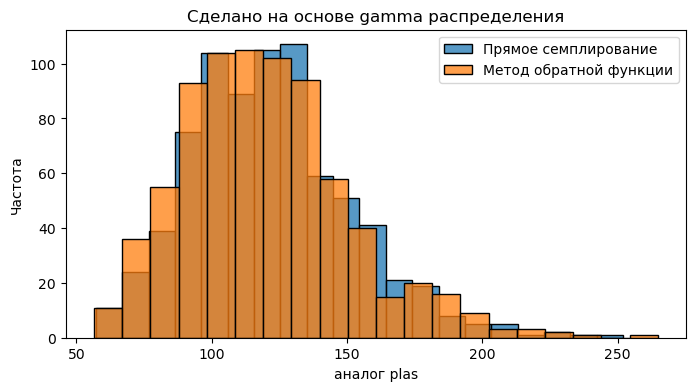

In [77]:
s,loc, scale = params_plas_MLE_gamma                             # plas
sampling_dist(gamma, s,loc, scale, name_column="plas")

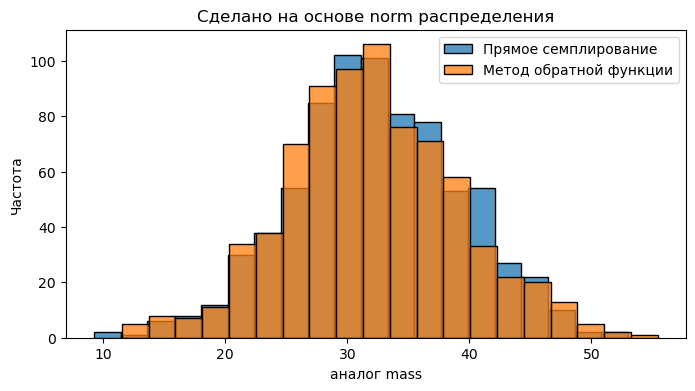

In [78]:
m, sigma = params_mass_MLE_norm                                     # mass
sampling_dist(norm,m, sigma, name_column="mass")

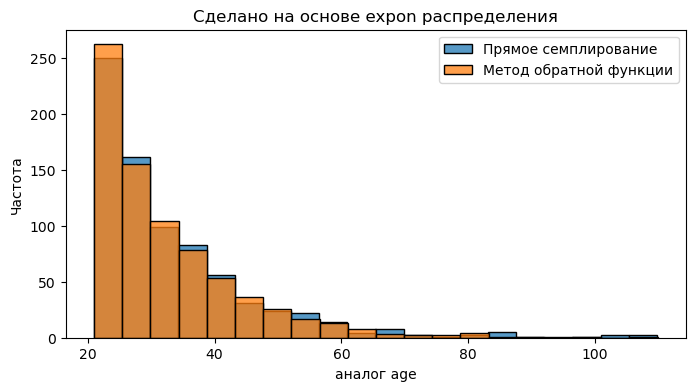

In [79]:
loc, scale = params_age_MLE_expon                                   # age
sampling_dist(expon, loc, scale, name_column="age")

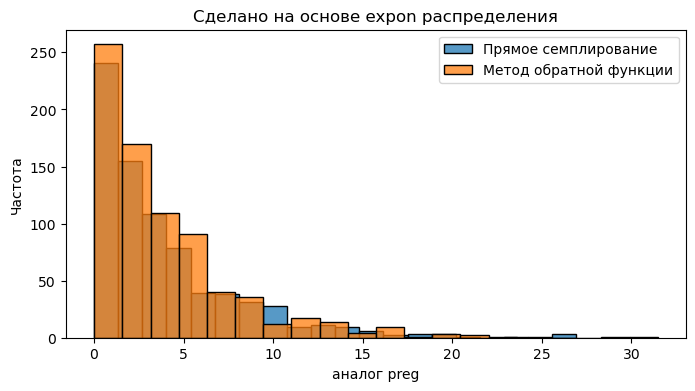

In [80]:
loc, scale = params_preg_MLE_expon                          # preg
sampling_dist(expon, loc, scale, name_column="preg")